#PhishSpotter
Phishing websites are becoming more prevalent and dangerous as they deceive individuals into revealing important information such as passwords and financial data. These websites frequently resemble authentic ones, confusing those who visit to identify the danger. As online transactions increase, the identification of phishing sites becomes increasingly vital for user protection.

Our objective is to develop a solution that can adapt to the ever-evolving characteristics of phishing websites. In this project, our solution involves developing machine-learning algorithms, specifically Logistic Regression (LR) and Support Vector Machine (SVM), and also developing deep-learning algorithms, specifically Recurring Neural Network (RNN), to accurately detect phishing websites and help improve online security.

These are all the packages required for the machine-learning process.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scipy.stats import zscore
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.model_selection import KFold
from joblib import dump, load

##Data Loading and Preprocessing
This is where the data is prepared to be used for the machine-learning algorithm.

1. Mount Google Drive into Colab

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


2. Load the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/phishingdataset.csv')
#df = pd.read_csv('/content/drive/MyDrive/dataset.csv')

# Display the first few rows of the dataset
print(df.head())

   index  having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0      1                          -1              1                   1   
1      2                           1              1                   1   
2      3                           1              0                   1   
3      4                           1              0                   1   
4      5                           1              0                  -1   

   having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                 1                        -1             -1   
1                 1                         1             -1   
2                 1                         1             -1   
3                 1                         1             -1   
4                 1                         1             -1   

   having_Sub_Domain  SSLfinal_State  Domain_registeration_length  ...  \
0                 -1              -1                           -1  ...   
1               

3. Find redundant data and drop the column.

In [ ]:
# Dropped redundant column which is 'index'
new_df = df.drop(columns=['index'])

4. Find missing data and display

In [ ]:
# Check for missing values
missing_values = new_df.isnull().sum()

# Output the number of missing values per column
missing_values

,0
having_IPhaving_IP_Address,0
URLURL_Length,0
Shortining_Service,0
having_At_Symbol,0
double_slash_redirecting,0
Prefix_Suffix,0
having_Sub_Domain,0
SSLfinal_State,0
Domain_registeration_length,0
Favicon,0


The result above shows that there are no missing values.

5. Find the number of outliers and where.

In [ ]:
z_scores = new_df.apply(zscore)
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)
outliers_count = outliers.sum()
print(outliers_count)

having_IPhaving_IP_Address        0
URLURL_Length                     0
Shortining_Service                0
having_At_Symbol                  0
double_slash_redirecting          0
Prefix_Suffix                     0
having_Sub_Domain                 0
SSLfinal_State                    0
Domain_registeration_length       0
Favicon                           0
port                              0
HTTPS_token                       0
Request_URL                       0
URL_of_Anchor                     0
Links_in_tags                     0
SFH                               0
Submitting_to_email               0
Abnormal_URL                      0
Redirect                          0
on_mouseover                      0
RightClick                      476
popUpWidnow                       0
Iframe                         1012
age_of_domain                     0
DNSRecord                         0
web_traffic                       0
Page_Rank                         0
Google_Index                

The above results show that the column 'RightClick' has 476 outliers and 'Iframe' has 1012 outliers.

6. Since the dataset has only binary or categorical data, scaling is not necessary and therefore skipped.

7. So, the next step is to split the data into training and testing test. We chose the random 80-20 split.

In [ ]:
from sklearn.model_selection import train_test_split

X = new_df.drop(columns=['Result'])
y = new_df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8844, 30), (2211, 30), (8844,), (2211,))

The result shows that the data set has 8,844 rows and 30 columns in the training set (8844,30). The test set contains 2,211 samples and 30 columns (2211,30). The training label contains 8,844 entries (8844,) while the test label contains 2211 entries (2211,).


8. The labels are formatted correctly for binary classification. Specifically, the labels should be 0 for phishing and 1 for legitimate websites.

In [ ]:
# Assuming the target variable is in the last column and features are all numeric
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values  # Target (1 for legitimate, -1 for phishing)

# Convert target labels to 0 for phishing and 1 for legitimate
y = np.where(y == -1, 0, 1)

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MODEL LR


In [ ]:
# Logistic Regression Model with Hyperparameter Tuning using GridSearchCV
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # L1 and L2 regularization
    'solver': ['liblinear']   # Solver to be used with l1 and l2 penalties
}

### Initialize the Logistic Regression model

In [ ]:
log_reg = LogisticRegression()

###Use GridSearchCV, Fit the model with the training data


In [ ]:
# find the best hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


###Train the final model, Make predictions

In [ ]:
# Train the final model with the best hyperparameters
best_log_reg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_log_reg.predict(X_test_scaled)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9276
Precision: 0.9287
Recall: 0.9450
F1 Score: 0.9368


###classification report

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          -1       0.93      0.90      0.92       956
           1       0.93      0.95      0.94      1255

    accuracy                           0.93      2211
   macro avg       0.93      0.92      0.93      2211
weighted avg       0.93      0.93      0.93      2211



### Confusion Matrix

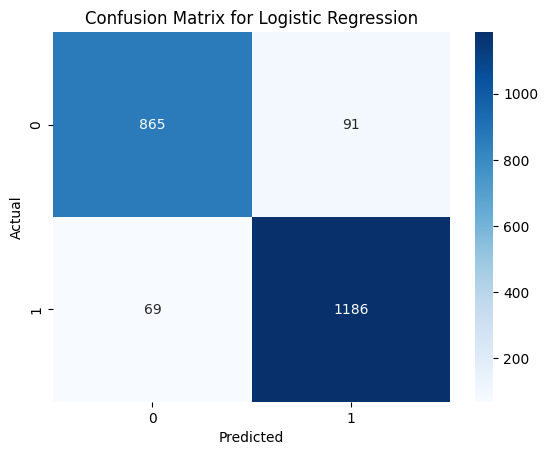

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# MODEL SVM

# 1. Model Training
This part will create three SVM models using different kernels: RBF, polynomial, and linear.

In [ ]:

# Train an SVM model with RBF kernel
rbf_svm = SVC(kernel='rbf', gamma=0.1, C=10).fit(X_train_scaled, y_train)

# Train an SVM model with Polynomial kernel
poly_svm = SVC(kernel='poly', degree=3, C=1).fit(X_train_scaled, y_train)

# Train an SVM model with Linear kernel
linear_svm = SVC(kernel='linear', C=1).fit(X_train_scaled, y_train)


# 2. Model Testing
This part will use the test data to generate predictions from all the three models.

In [ ]:
# Test the RBF kernel SVM model
rbf_pred = rbf_svm.predict(X_test_scaled)

# Test the Polynomial kernel SVM model
poly_pred = poly_svm.predict(X_test_scaled)

# Test the Linear kernel SVM model
linear_pred = linear_svm.predict(X_test_scaled)


# 3. Model Evaluation
This part will calculate and print the accuracy and F1 scores for all the three models.

In [ ]:

# Evaluate the Polynomial kernel SVM model
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

# Evaluate the RBF kernel SVM model
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

# Evaluate the Linear kernel SVM model
linear_accuracy = accuracy_score(y_test, linear_pred)
linear_f1 = f1_score(y_test, linear_pred, average='weighted')
print('Accuracy (Linear Kernel): ', "%.2f" % (linear_accuracy*100))
print('F1 (Linear Kernel): ', "%.2f" % (linear_f1*100))


Accuracy (Polynomial Kernel):  95.02
F1 (Polynomial Kernel):  95.01
Accuracy (RBF Kernel):  96.65
F1 (RBF Kernel):  96.65
Accuracy (Linear Kernel):  92.85
F1 (Linear Kernel):  92.84


# Finding the Best Parameters using GridSearchCV
This part will use GridSearchCV to fine-tune C and gamma parameters for the RBF kernel only Since the it has the best performance among all the three models.

In [ ]:
# Define the parameter grid for RBF kernel
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']  # Only search within the RBF kernel
}

# Initialize the SVM model for GridSearchCV
svm_model = SVC()

# Use GridSearchCV to search for the best combination of parameters for RBF
grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("Best parameters for RBF kernel are:", grid_search.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   2.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   2.8s
[CV] END ...........................C=1, gamma=1,

In [ ]:

# Get detailed results from the grid search
mean_score = grid_search.cv_results_['mean_test_score']
std_score = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

# Print the mean score, standard deviation, and parameters
for mean, std, params in zip(mean_score, std_score, params):
      print(f'{round(mean,2)} + or -{round(std,2)} for the {params}')

0.94 + or -0.0 for the {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.96 + or -0.0 for the {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.86 + or -0.0 for the {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.95 + or -0.0 for the {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.97 + or -0.0 for the {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.87 + or -0.0 for the {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.96 + or -0.0 for the {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.97 + or -0.0 for the {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.87 + or -0.0 for the {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


# 4. Model Evaluation with Best Parameters
This part will use the best-found parameters for the RBF kernel to evaluate the performance again.

In [ ]:
# Use the best RBF model from GridSearchCV
best_rbf_model = grid_search.best_estimator_

# Make predictions using the optimized RBF model
best_rbf_pred = best_rbf_model.predict(X_test_scaled)

# Evaluate the optimized RBF model
best_rbf_accuracy = accuracy_score(y_test, best_rbf_pred)
best_rbf_f1 = f1_score(y_test, best_rbf_pred, average='weighted')

print('Accuracy (Best RBF Kernel): ', "%.2f" % (best_rbf_accuracy*100))
print('F1 (Best RBF Kernel): ', "%.2f" % (best_rbf_f1*100))



Accuracy (Best RBF Kernel):  96.65
F1 (Best RBF Kernel):  96.65


# Classification report

In [ ]:
# Print the classification report
print(classification_report(y_test, best_rbf_pred))


              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.96      0.97      2211
weighted avg       0.97      0.97      0.97      2211



# Confusion matrix

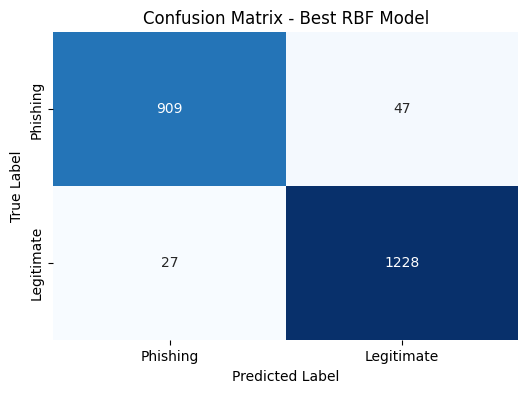

In [ ]:
# Compute confusion matrix for the best RBF model
conf_matrix = confusion_matrix(y_test, best_rbf_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Phishing', 'Legitimate'], yticklabels=['Phishing', 'Legitimate'])
plt.title('Confusion Matrix - Best RBF Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#MODEL RNN

#1.Data Preprocessing



In [ ]:
# Convert X_train and X_test to NumPy arrays before reshaping
X_train_rnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))


# 2.RUN RNN Model
 Create the RNN model using LSTM with binary cross-entropy as the loss function and a sigmoid activation function for binary classification (0 or 1).

In [ ]:
# Define the LSTM-based RNN model
def create_rnn_model(optimizer='adam', units=64, dropout_rate=0.3):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], 1)))  # Input layer with the correct input shape
    model.add(LSTM(units=units, return_sequences=False))  # LSTM layer
    model.add(Dropout(dropout_rate))  # Dropout to prevent overfitting
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification (0 or 1)

    # Compile the model with binary cross-entropy
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


#3.Hyperparameter Tuning Using K-Fold Cross-Validation

Perform cross-validation with different hyperparameter configurations to find the best model setup.

In [ ]:
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

param_grid = {
    'units': [32, 64],  # LSTM units
    'dropout_rate': [0.2, 0.3],  # Dropout rates to prevent overfitting
    'optimizer': ['adam', 'rmsprop'],  # Optimizers to adjust weights
    'epochs': [10, 20],  # Number of epochs
    'batch_size': [16, 32]  # Batch sizes
}

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=3)
best_accuracy = 0
best_params = {}

for units in param_grid['units']:
    for dropout_rate in param_grid['dropout_rate']:
        for optimizer in param_grid['optimizer']:
            for epochs in param_grid['epochs']:
                for batch_size in param_grid['batch_size']:
                    for train_idx, val_idx in kf.split(X_train_rnn):
                        # Split the training data
                        X_train_fold, X_val_fold = X_train_rnn[train_idx], X_train_rnn[val_idx]
                        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

                        # Create and train the model
                        model = create_rnn_model(units=units, dropout_rate=dropout_rate, optimizer=optimizer)
                        model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, verbose=0)

                        # Evaluate on validation data
                        val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]

                        if val_accuracy > best_accuracy:
                            best_accuracy = val_accuracy
                            best_params = {
                                'units': units,
                                'dropout_rate': dropout_rate,
                                'optimizer': optimizer,
                                'epochs': epochs,
                                'batch_size': batch_size
                            }

print(f"Best Hyperparameters: {best_params}")


#4.Training the Final Model with Best Hyperparameters

 best hyperparameters found from cross-validation to train the final model on the entire training dataset.

In [ ]:
# Train the final model using the best hyperparameters
final_model = create_rnn_model(units=best_params['units'],
                               dropout_rate=best_params['dropout_rate'],
                               optimizer=best_params['optimizer'])

# Train the model
final_model.fit(X_train_rnn, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

# Evaluate the final model on the test set
test_loss, test_accuracy = final_model.evaluate(X_test_rnn, y_test, verbose=1)

print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/20
553/553 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1946 - loss: -0.9224
Epoch 2/20
553/553 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2528 - loss: -3.8734
Epoch 3/20
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2629 - loss: -7.6070
Epoch 4/20
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2904 - loss: -15.6467
Epoch 5/20
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3175 - loss: -24.1176
Epoch 6/20
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3408 - loss: -31.8960
Epoch 7/20
553/553 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3525 - loss: -43.1931
Epoch 8/20
553/553 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3532 - loss: -49.9240
Epoch 9/20
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3745 - loss: -62.0924
Epoch 10/20
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3772 - loss: -73.7915
Epoch 11/20
553/553 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3725 - loss: -86.8748
Epoch 12/20
553/553 ━━━━━━━━━━━━━

#VALIDATION

####Comparing Performance of Logistic Regression, SVM with RBF Kernel, and RNN Models on Test Set

In [ ]:
test_results = {}

# Logistic Regression
y_pred_log_reg = best_log_reg.predict(X_test_scaled)
test_results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_log_reg),
    'precision': precision_score(y_test, y_pred_log_reg),
    'recall': recall_score(y_test, y_pred_log_reg),
    'f1': f1_score(y_test, y_pred_log_reg)
}



In [ ]:
# SVM with RBF Kernel
y_pred_rbf = best_rbf_model.predict(X_test_scaled)
test_results['SVM (RBF)'] = {
    'accuracy': accuracy_score(y_test, y_pred_rbf),
    'precision': precision_score(y_test, y_pred_rbf),
    'recall': recall_score(y_test, y_pred_rbf),
    'f1': f1_score(y_test, y_pred_rbf)
}


In [ ]:
# RNN Model
y_pred_rnn = (final_model.predict(X_test_rnn) > 0.5).astype(int).ravel()
test_results['RNN'] = {
    'accuracy': accuracy_score(y_test, y_pred_rnn),
    'precision': precision_score(y_test, y_pred_rnn),
    'recall': recall_score(y_test, y_pred_rnn),
    'f1': f1_score(y_test, y_pred_rnn)
}



70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
# Display validation results
print("\nValidation Results:")
for model_name, metrics in test_results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")



Validation Results:
Logistic Regression:
  accuracy: 0.9272
  precision: 0.9287
  recall: 0.9442
  f1: 0.9364
SVM (RBF):
  accuracy: 0.9665
  precision: 0.9631
  recall: 0.9785
  f1: 0.9708
RNN:
  accuracy: 0.8417
  precision: 0.9502
  recall: 0.7610
  f1: 0.8451


####The Results reveal that the SVM with RBF kernel achieved the highest performance across all metrics.This indicates that the RBF kernel was the most effective model for detecting phishing websites, outperforming both Logistic Regression and the RNN model in terms of accuracy and robustness.

#Analyzing the Impact of Regularization Parameter C on Test Accuracy for an SVM with RBF Kernel

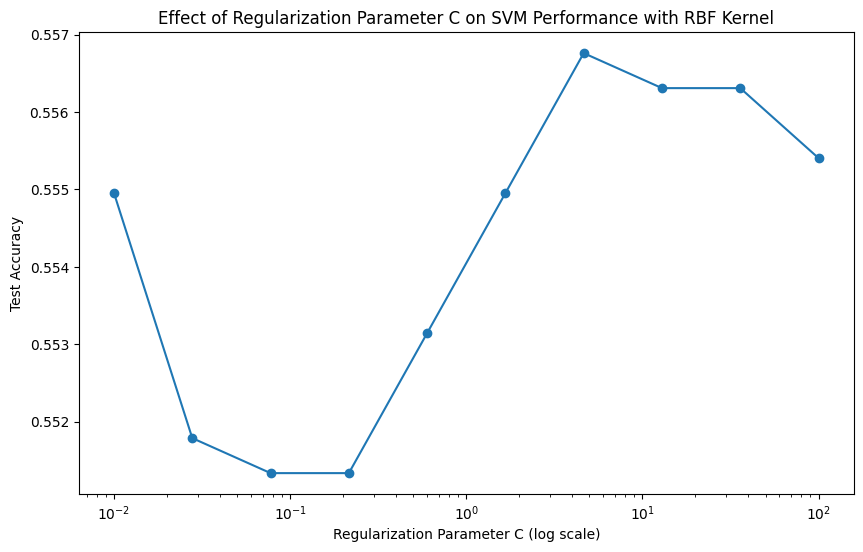

In [ ]:
# Define a range of C values
C_values = np.logspace(-2, 2, 10)  # C values from 0.01 to 100
test_accuracies = []

# Train and evaluate the model for each C value
for C in C_values:
    model = SVC(kernel='rbf', gamma=0.1, C=C)
    model.fit(X_train_scaled, y_train)

    # Evaluate on the test set
    test_accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
    test_accuracies.append(test_accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(C_values, test_accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Regularization Parameter C (log scale)')
plt.ylabel('Test Accuracy')
plt.title('Effect of Regularization Parameter C on SVM Performance with RBF Kernel')
plt.show()


####The plot illustrates how varying the regularization parameter C affects the test accuracy of an SVM with an RBF kernel. At lower values of C, the model's accuracy decreases, likely due to underfitting as it applies stronger regularization. As C increases, test accuracy improves, reaching a peak around C=10^1 and slightly decreasing afterward. This pattern suggests that higher C values, which allow the model to fit the training data more closely, provide better generalization in this case.This pattern suggests that higher C values, which allow the model to fit the training data more closely, provide better generalization in this case. Based on the grid search results, the optimal value for C was found to be C=100, indicating that the model benefits from a relatively high C value to reduce regularization and achieve the best performance.

add Area Under the Curve (AUC) as part of the evaluation,  for calculating and plotting AUC for Logistic Regression, SVM (RBF kernel), and RNN.

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve


#Logistic Regression AUC

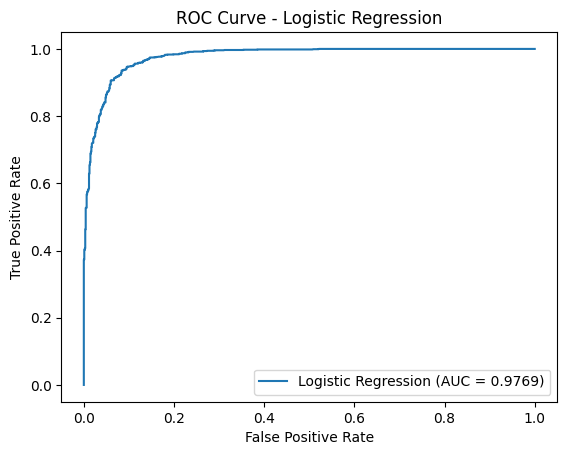

Logistic Regression AUC: 0.9769


In [ ]:
# Logistic Regression AUC
log_reg_auc = roc_auc_score(y_test, best_log_reg.predict_proba(X_test_scaled)[:, 1])
fpr, tpr, _ = roc_curve(y_test, best_log_reg.predict_proba(X_test_scaled)[:, 1])

plt.figure()
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {log_reg_auc:.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

print(f"Logistic Regression AUC: {log_reg_auc:.4f}")


#SVM (RBF Kernel) AUC

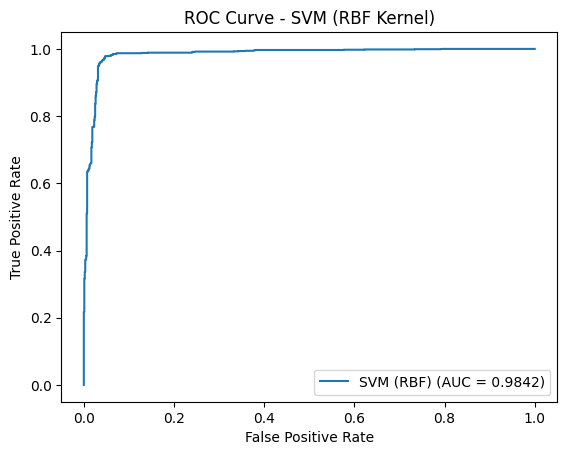

SVM (RBF) AUC: 0.9842


In [ ]:
# SVM (RBF Kernel) AUC
svm_auc = roc_auc_score(y_test, best_rbf_model.decision_function(X_test_scaled))
fpr, tpr, _ = roc_curve(y_test, best_rbf_model.decision_function(X_test_scaled))

plt.figure()
plt.plot(fpr, tpr, label=f"SVM (RBF) (AUC = {svm_auc:.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM (RBF Kernel)")
plt.legend()
plt.show()

print(f"SVM (RBF) AUC: {svm_auc:.4f}")


#RNN Model AUC

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


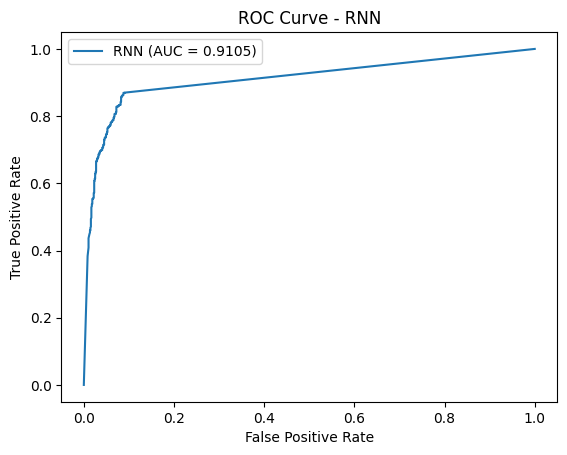

RNN AUC: 0.9105


In [ ]:
# RNN AUC
rnn_auc = roc_auc_score(y_test, final_model.predict(X_test_rnn).ravel())
fpr, tpr, _ = roc_curve(y_test, final_model.predict(X_test_rnn).ravel())

plt.figure()
plt.plot(fpr, tpr, label=f"RNN (AUC = {rnn_auc:.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - RNN")
plt.legend()
plt.show()

print(f"RNN AUC: {rnn_auc:.4f}")






The AUC results reveal that the SVM (RBF) model performs best with an AUC of 0.9842, indicating strong capability in distinguishing phishing websites. Logistic Regression follows closely with an AUC of 0.9769, showing it to be a competitive, simpler alternative. The RNN model, with an AUC of 0.9185, performs adequately but is less effective than SVM andLogistic Regression